<h2>Problem Statement</h2>

About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

<h2>Problem</h2>

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

[Competition Link](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')

print(os.listdir("./"))


['train.csv', 'push.txt', '.git', 'submit.csv', 'sample.csv', 'test.csv', '.ipynb_checkpoints', 'README.md', 'LoanPrediction.ipynb']


<h3>Load and preview the data</h3>

In [86]:
data = pd.read_csv('train.csv', index_col = 'Loan_ID')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
test = pd.read_csv('test.csv' , index_col= 'Loan_ID')
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<h3>We can observe that many of the feilds are categorical data . Lets find out all the unique values in these columns</h3>

In [88]:
print("Gender Unique Value: "  , data.Gender.unique())
print("Dependents Unique Value: "  , data.Dependents.unique())
print("Education Unique Value: "  , data.Education.unique())
print("Credit_History Unique Value: "  , data.Credit_History.unique())
print("Property_Area Unique Value: "  , data.Property_Area.unique())
print("Loan_Status Unique Value: "  , data.Loan_Status.unique())


Gender Unique Value:  ['Male' 'Female' nan]
Dependents Unique Value:  ['0' '1' '2' '3+' nan]
Education Unique Value:  ['Graduate' 'Not Graduate']
Credit_History Unique Value:  [ 1.  0. nan]
Property_Area Unique Value:  ['Urban' 'Rural' 'Semiurban']
Loan_Status Unique Value:  ['Y' 'N']


<h3>Summarize the data</h3>

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [90]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [91]:
data.Dependents.replace('3+', '5', inplace=True)
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,5,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [92]:
test.Dependents.replace('3+', '5', inplace=True)
test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban


In [93]:
categorical_col = ['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Credit_History' ,'Property_Area','Loan_Status' ]

<h3>Encode categorical data<h3>

In [94]:
data[categorical_col] = data[categorical_col].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null category
Married              611 non-null category
Dependents           599 non-null object
Education            614 non-null category
Self_Employed        582 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null category
Property_Area        614 non-null category
Loan_Status          614 non-null category
dtypes: category(7), float64(3), int64(1), object(1)
memory usage: 33.6+ KB


In [95]:
categorical_col = ['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Credit_History' ,'Property_Area' ]
test[categorical_col] = test[categorical_col].astype('category')
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Gender               356 non-null category
Married              367 non-null category
Dependents           357 non-null object
Education            367 non-null category
Self_Employed        344 non-null category
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null category
Property_Area        367 non-null category
dtypes: category(6), float64(2), int64(2), object(1)
memory usage: 19.9+ KB


In [96]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<h3> Fill the missing value with most common value <h3>

In [97]:
for col in categorical_col:
    data[col].fillna(data[col].mode()[0] , inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0] , inplace =True)
data['Dependents'] = data['Dependents'].astype('int')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               614 non-null category
Married              614 non-null category
Dependents           614 non-null int64
Education            614 non-null category
Self_Employed        614 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null category
Property_Area        614 non-null category
Loan_Status          614 non-null category
dtypes: category(7), float64(3), int64(2)
memory usage: 33.6+ KB


In [99]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [100]:
for col in categorical_col:
    test[col].fillna(test[col].mode()[0] , inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0] , inplace =True)
test['Dependents'] = test['Dependents'].astype('int')

In [101]:
numerical_col = ['ApplicantIncome' ,'CoapplicantIncome' , 'LoanAmount' , 'Loan_Amount_Term' ]

In [102]:
for col in numerical_col:
    data[col].fillna(data[col].median() , inplace =True)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               614 non-null category
Married              614 non-null category
Dependents           614 non-null int64
Education            614 non-null category
Self_Employed        614 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null category
Property_Area        614 non-null category
Loan_Status          614 non-null category
dtypes: category(7), float64(3), int64(2)
memory usage: 33.6+ KB


In [104]:
for col in numerical_col:
    test[col].fillna(test[col].median() , inplace =True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Gender               367 non-null category
Married              367 non-null category
Dependents           367 non-null int64
Education            367 non-null category
Self_Employed        367 non-null category
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null category
Property_Area        367 non-null category
dtypes: category(6), float64(2), int64(3)
memory usage: 19.9+ KB


In [105]:
print("Gender Unique Value: "  , data.Gender.unique())
print("Education Unique Value: "  , data.Education.unique())
print("Credit_History Unique Value: "  , data.Credit_History.unique())
print("Property_Area Unique Value: "  , data.Property_Area.unique())
print("Loan_Status Unique Value: "  , data.Loan_Status.unique())


Gender Unique Value:  [Male, Female]
Categories (2, object): [Male, Female]
Education Unique Value:  [Graduate, Not Graduate]
Categories (2, object): [Graduate, Not Graduate]
Credit_History Unique Value:  [1.0, 0.0]
Categories (2, float64): [1.0, 0.0]
Property_Area Unique Value:  [Urban, Rural, Semiurban]
Categories (3, object): [Urban, Rural, Semiurban]
Loan_Status Unique Value:  [Y, N]
Categories (2, object): [Y, N]


<h1> OneHot </h1>

In [106]:
data = pd.get_dummies(data ,columns = ['Gender' , 'Education' ,'Credit_History','Married' , 'Self_Employed' , 'Property_Area','Loan_Status' ])

In [107]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,,,,,,
LP001002,0,5849,0.0,128.0,360.0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1
LP001003,1,4583,1508.0,128.0,360.0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0
LP001005,0,3000,0.0,66.0,360.0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1
LP001006,0,2583,2358.0,120.0,360.0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1
LP001008,0,6000,0.0,141.0,360.0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1


In [108]:
redundant_col = ['Loan_Status_N','Gender_Male' ,'Education_Graduate' ,  'Credit_History_1.0' ,'Married_No' , 'Self_Employed_No' ,'Property_Area_Urban'  ]
data.drop(axis = 1, columns=redundant_col , inplace = True)

In [109]:
data.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Education_Not Graduate,Credit_History_0.0,Married_Yes,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,
LP001002,0,5849,0.0,128.0,360.0,0,0,0,0,0,0,0,1
LP001003,1,4583,1508.0,128.0,360.0,0,0,0,1,0,1,0,0
LP001005,0,3000,0.0,66.0,360.0,0,0,0,1,1,0,0,1


In [110]:
test = pd.get_dummies(test ,columns = ['Gender' , 'Education' ,'Credit_History','Married' , 'Self_Employed' , 'Property_Area'])
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,
LP001015,0,5720,0,110.0,360.0,0,1,1,0,0,1,0,1,1,0,0,0,1
LP001022,1,3076,1500,126.0,360.0,0,1,1,0,0,1,0,1,1,0,0,0,1
LP001031,2,5000,1800,208.0,360.0,0,1,1,0,0,1,0,1,1,0,0,0,1
LP001035,2,2340,2546,100.0,360.0,0,1,1,0,0,1,0,1,1,0,0,0,1
LP001051,0,3276,0,78.0,360.0,0,1,0,1,0,1,1,0,1,0,0,0,1


In [111]:
redundant_col = ['Gender_Male' ,'Education_Graduate' ,  'Credit_History_1.0' ,'Married_No' , 'Self_Employed_No' ,'Property_Area_Urban'  ]
test.drop(axis = 1, columns=redundant_col , inplace = True)

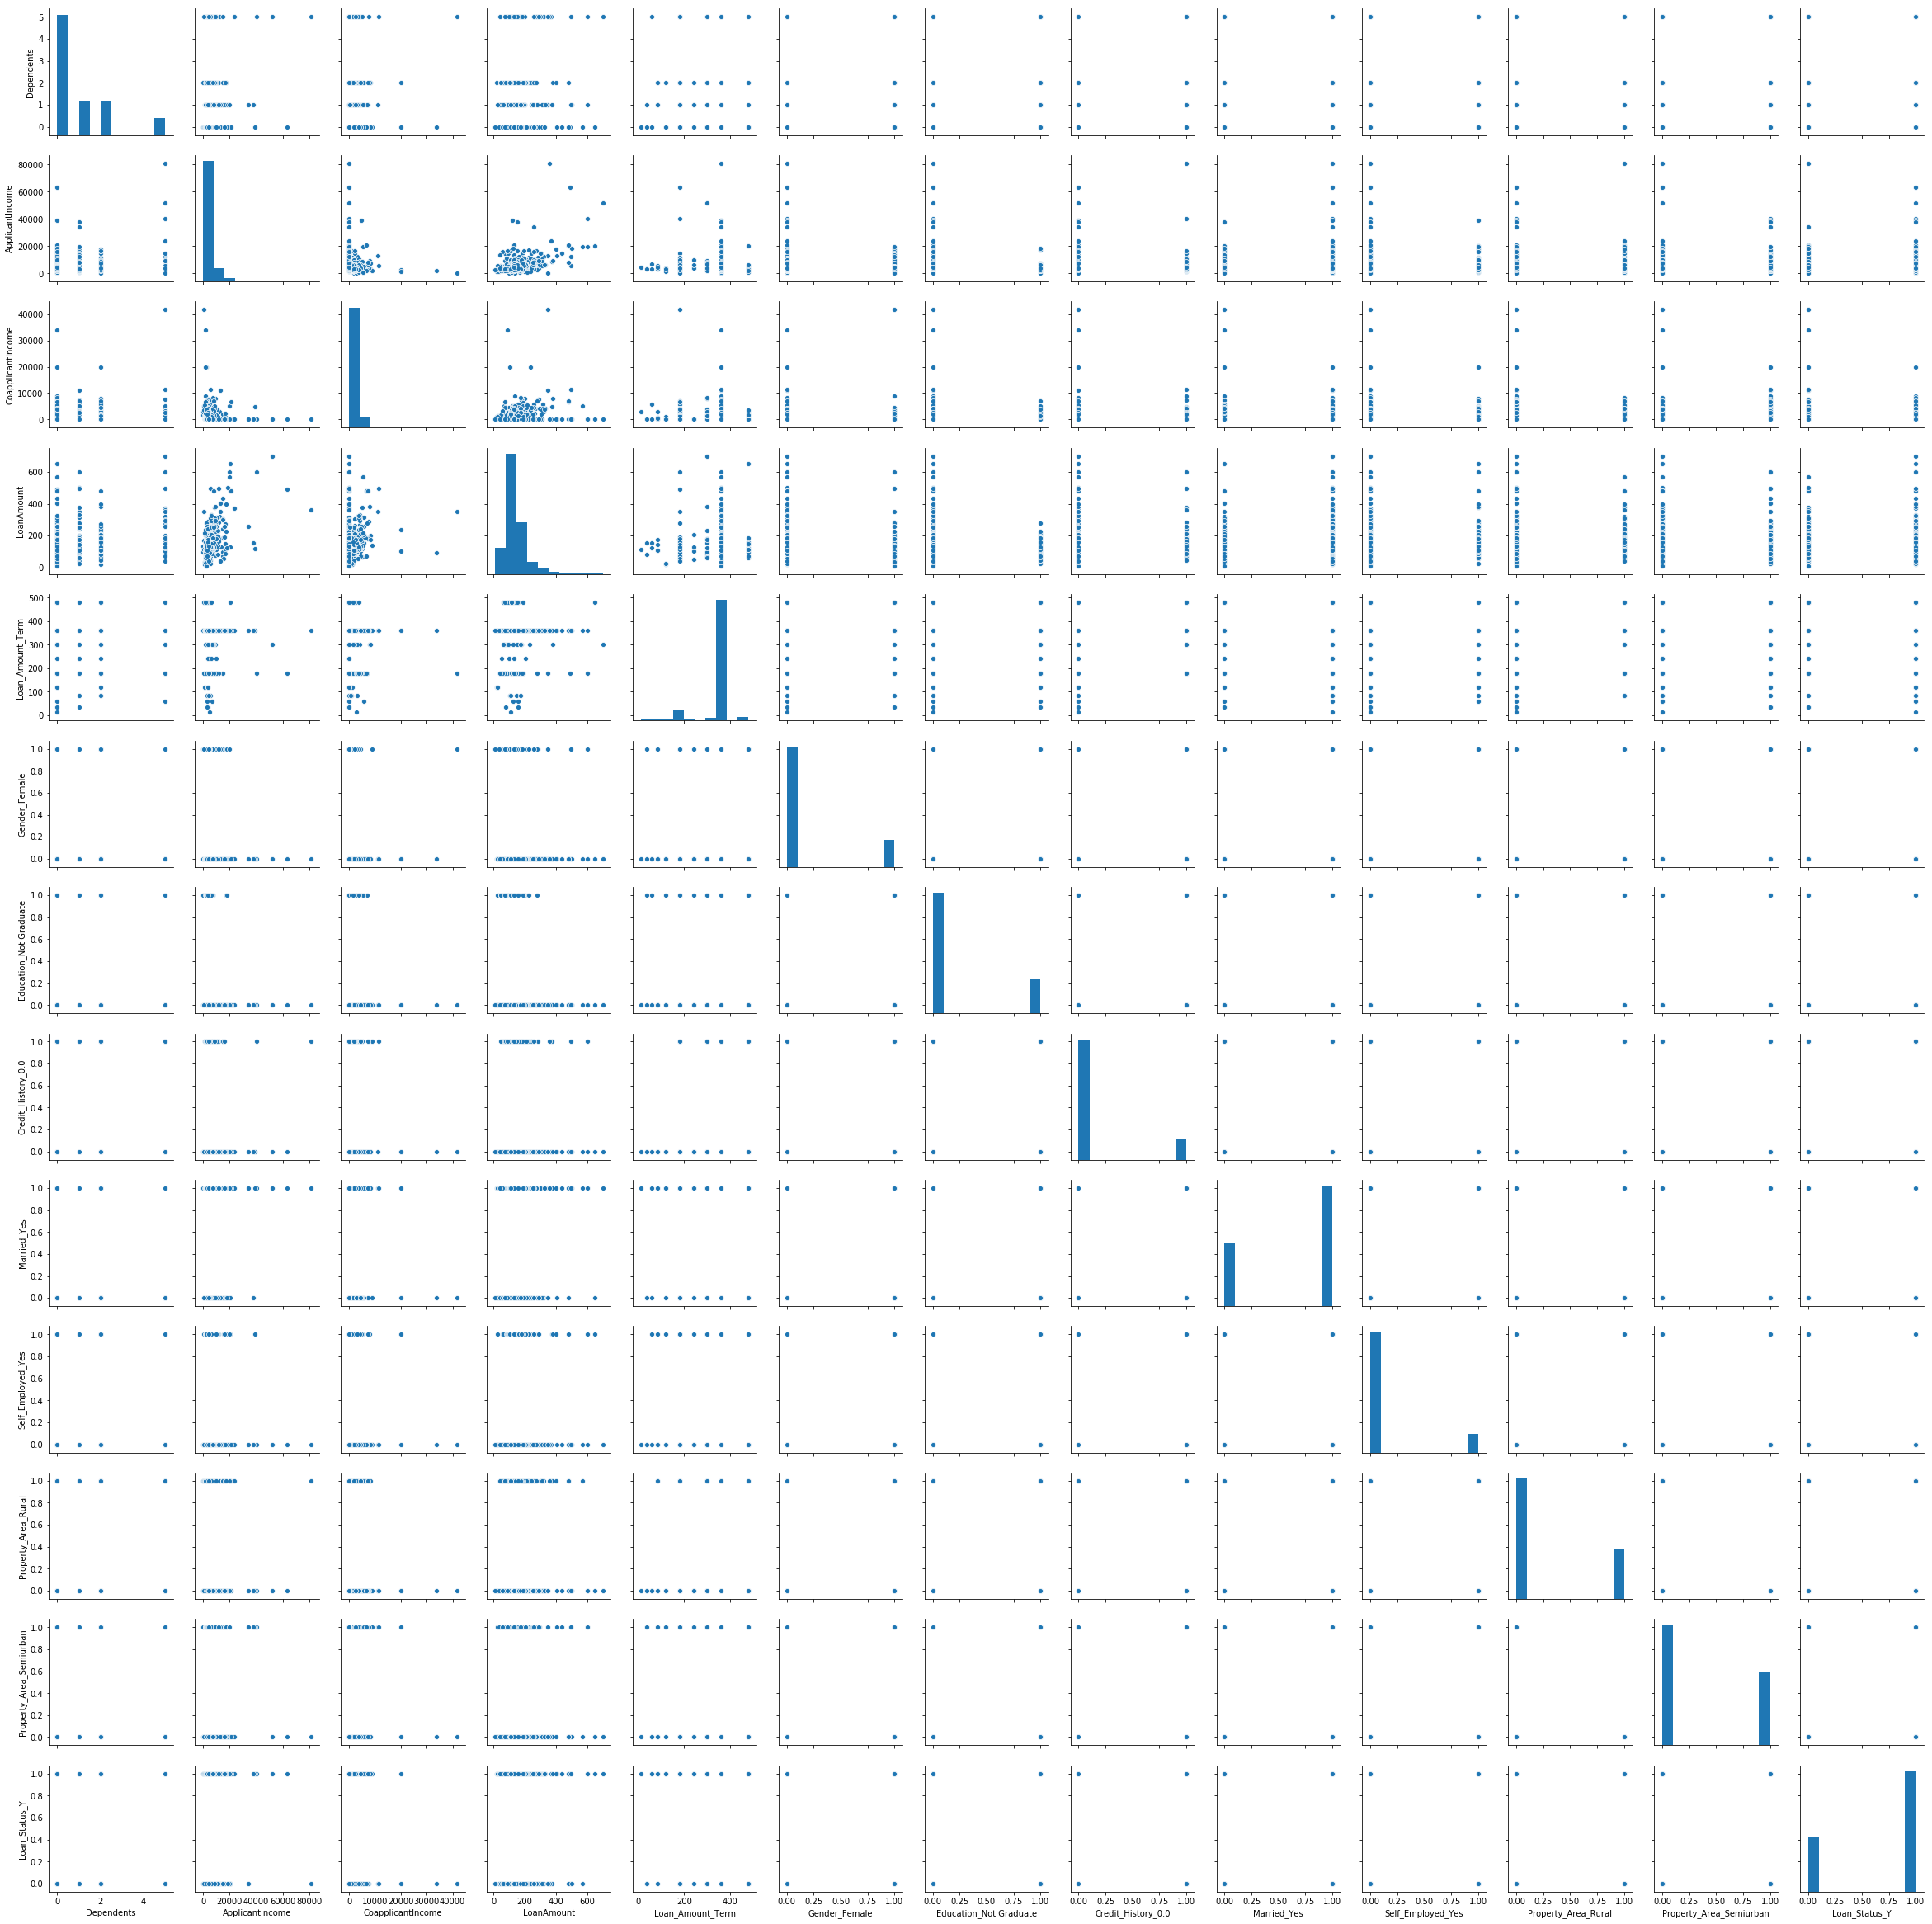

In [112]:
sns.pairplot(data)

In [113]:
X_train ,X_test , y_train , y_test = train_test_split(data.drop(['Loan_Status_Y'] , axis = 1) , data['Loan_Status_Y'] , test_size = 0.2 , random_state = 123)

In [114]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(491, 12) (123, 12) (491,) (123,)


In [115]:
clf = KNeighborsClassifier(n_neighbors=6 )
clf.fit(X_train , y_train)
pre = clf.predict(X_test)
clf.score(X_test, y_test)

0.5365853658536586

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier( )
scores = cross_val_score(clf, X_train, y_train, cv=5).mean()
scores

0.7779220779220779

In [117]:
clf.fit(X_train, y_train)
clf.score(X_test , y_test)

0.7723577235772358

<h3>Preprocessing</h3>

In [118]:
scaler = StandardScaler()

In [120]:
data_1 = data.drop(['Loan_Status_Y'] , axis =1)
label = data['Loan_Status_Y']

In [121]:
data_1 = scaler.fit_transform(data_1)
test = scaler.transform(test)

In [122]:
X_train ,X_test , y_train , y_test = train_test_split(data_1  , label , test_size = 0.2 , random_state = 123)

In [123]:
clf = GradientBoostingClassifier( )
scores = cross_val_score(clf, X_train, y_train, cv=5).mean()
scores

0.7759018759018759

In [124]:
clf.fit(X_train , y_train)
clf.score(X_test, y_test)

0.7642276422764228

<h3> Improving GradientBoostingClassifier </h3>

<h5>Learning rate</h5>

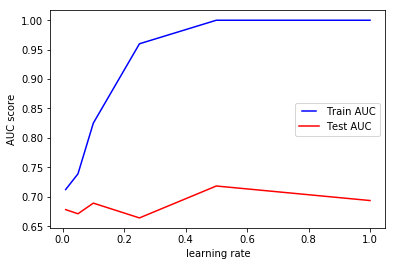

In [125]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

In [126]:
clf = GradientBoostingClassifier(learning_rate=0.1 )
scores = cross_val_score(clf, X_train, y_train, cv=5).mean()
scores

0.7779426922284064

In [127]:
clf.fit(X_train , y_train)
clf.score(X_test, y_test)

0.7642276422764228

<h4> N_estimator </h4>

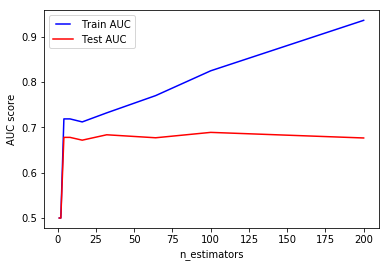

In [128]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [129]:
clf = GradientBoostingClassifier(learning_rate= 0.111101 , n_estimators=10 )
scores = cross_val_score(clf, X_train, y_train, cv=5).mean()
print('cv score' ,scores)
clf.fit(X_train , y_train)
print('accuracy on train data' , clf.score(X_train , y_train))
print('accuracy on test data' , clf.score(X_test, y_test))


cv score 0.8105751391465678
accuracy on train data 0.8207739307535642
accuracy on test data 0.7723577235772358


In [130]:
predict = clf.predict(test)

In [131]:
predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [132]:
!ls

LoanPrediction.ipynb  README.md   submit.csv  train.csv
push.txt	      sample.csv  test.csv


In [133]:
submit = pd.read_csv('sample.csv')
submit['Loan_Status'] = predict
submit['Loan_Status'] = submit.Loan_Status.map({1 :'Y' , 0:'N'})

In [135]:
submit.head(100)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [136]:
submit.to_csv('submit.csv', index = False)

In [137]:
!ls

LoanPrediction.ipynb  README.md   submit.csv  train.csv
push.txt	      sample.csv  test.csv
